# Visualization of inversion - Diorama data

In [53]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import matplotlib.pyplot as plt
import cPickle as pickle
import os
import matplotlib as mpb

from fatiando import utils
from fatiando.gravmag import polyprism
from fatiando.gravmag.transform import reduce_to_pole
from fatiando.mesher import PolygonalPrism
from fatiando.vis import mpl, myv
from matplotlib import colors, ticker, cm
from IPython.display import Image as img
from matplotlib.mlab import normpdf
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [54]:
import sys
sys.path.insert(0, '../../code')

import mag_polyprism_functions as mfun
import mag_sphere_functions as msf

In [55]:
mypath = 'tfa_inversion/upward_inc-71_dec-23_r100_int15_z00_dz850/'

In [56]:
with open(mypath+'inversion.pickle') as w:
        di = pickle.load(w)

In [57]:
di['residual']

array([-19.25256112, -16.93955466, -14.66312818, ...,  10.07877065,
         8.82572543,   7.42685283])

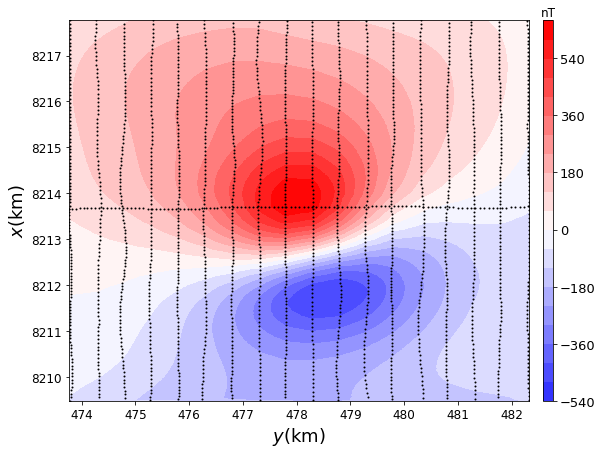

In [58]:
plt.figure(figsize=(10,7))
#plt.title('Observed TFA', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.max(di['observed_data'])*(-1), vmax=np.max(di['observed_data']))
plt.tricontourf(di['yp'], di['xp'], di['observed_data'], 20, cmap='bwr', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
plt.ylim((np.min(di['xp']), np.max(di['xp'])))
plt.xlim((np.min(di['yp']), np.max(di['yp'])))
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
plt.plot(di['yp'], di['xp'], 'ok', markersize=1)
#clines = plt.tricontour(yp, xp, dobs, 20, colors='k', linewidths=0.2)
#plt.clabel(clines, fontsize=4, fmt='%3d')
mpl.m2km()
#plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1, edgecolor='black')
plt.savefig(mypath+'diorama_real_data.png', dpi=300, bbox_inches="tight")
plt.show()
#img(filename=mypath+'diorama_real_data.png', width=1000, height=1200)

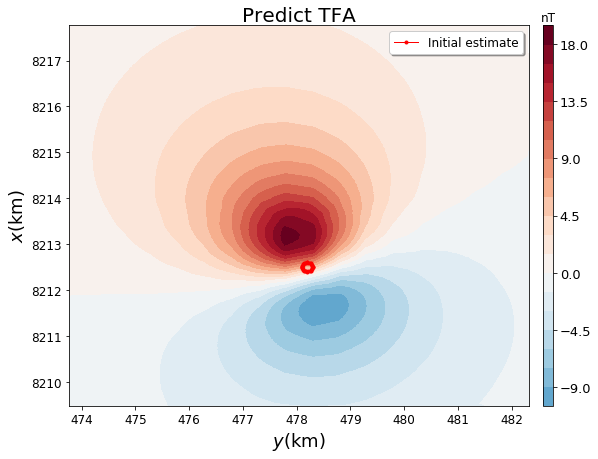

In [59]:
plt.figure(figsize=(10,7))
plt.title('Predict TFA', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.max(di['initial_data'])*(-1), vmax=np.max(di['initial_data']))
plt.tricontourf(di['yp'], di['xp'], di['initial_data'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
plt.ylim((np.min(di['xp']), np.max(di['xp'])))
plt.xlim((np.min(di['yp']), np.max(di['yp'])))
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
#source = mpl.polygon(kimberlite_model['prisms'][0], '.-k', xy2ne=True)
estimate = mpl.polygon(di['initial_estimate'][0], '.-r', xy2ne=True)
#source.set_label('Outcropping polygon')
estimate.set_label('Initial estimate')
clb.ax.set_title('nT')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)
plt.savefig(mypath+'diorama_tfa_pred_data_true_inital.png', dpi=300, bbox_inches="tight")
plt.show()

#img(filename=mypath+'diorama_tfa_pred_data_true_inital.png', width=1000, height=1200)

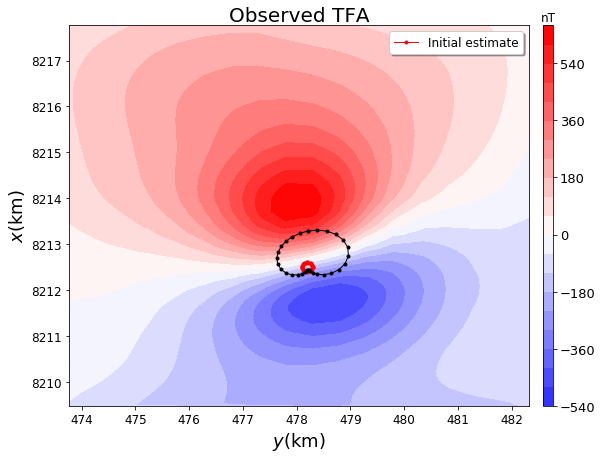

In [60]:
plt.figure(figsize=(10,7))
plt.title('Observed TFA', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.max(di['observed_data'])*(-1), vmax=np.max(di['observed_data']))
plt.tricontourf(di['yp'], di['xp'], di['observed_data'], 20, cmap='bwr', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
plt.ylim((np.min(di['xp']), np.max(di['xp'])))
plt.xlim((np.min(di['yp']), np.max(di['yp'])))
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
#source = mpl.polygon(kimberlite_model['prisms'][0], '.-k', xy2ne=True)
estimate = mpl.polygon(di['initial_estimate'][0], '.-r', xy2ne=True)
est = mpl.polygon(di['prisms'][0], '.-k', xy2ne=True)
#source.set_label('Outcropping polygon')
estimate.set_label('Initial estimate')
clb.ax.set_title('nT')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)
plt.savefig(mypath+'diorama_tfa_obs_data_true_inital.png', dpi=300, bbox_inches="tight")
plt.show()

#img(filename=mypath+'diorama_tfa_obs_data_true_inital.png', width=1000, height=1200)

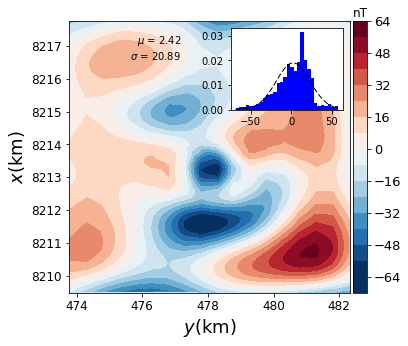

In [61]:
plt.figure(figsize=(6,5))
ax=mpl.subplot(1,1,1)
#plt.title('Residual', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.max(di['residual'])*(-1), vmax=np.max(di['residual']))
plt.tricontourf(di['yp'], di['xp'], di['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
plt.ylim((np.min(di['xp']), np.max(di['xp'])))
plt.xlim((np.min(di['yp']), np.max(di['yp'])))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
mpl.m2km()
inset = inset_axes(ax, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(di['residual'])
std = np.std(di['residual'])
nbins=30
n, bins, patches = plt.hist(di['residual'],bins=nbins, normed=True, facecolor='blue')
plt.text(0.4, 0.96, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std), 
         horizontalalignment='right',
         verticalalignment='top',
         transform = ax.transAxes, fontsize=10)
gauss = normpdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')


plt.savefig(mypath+'diorama_tfa_residual.png', dpi=300, bbox_inches="tight")
plt.show()
#img(filename=mypath+'diorama_tfa_residual.png', width=1600, height=400)

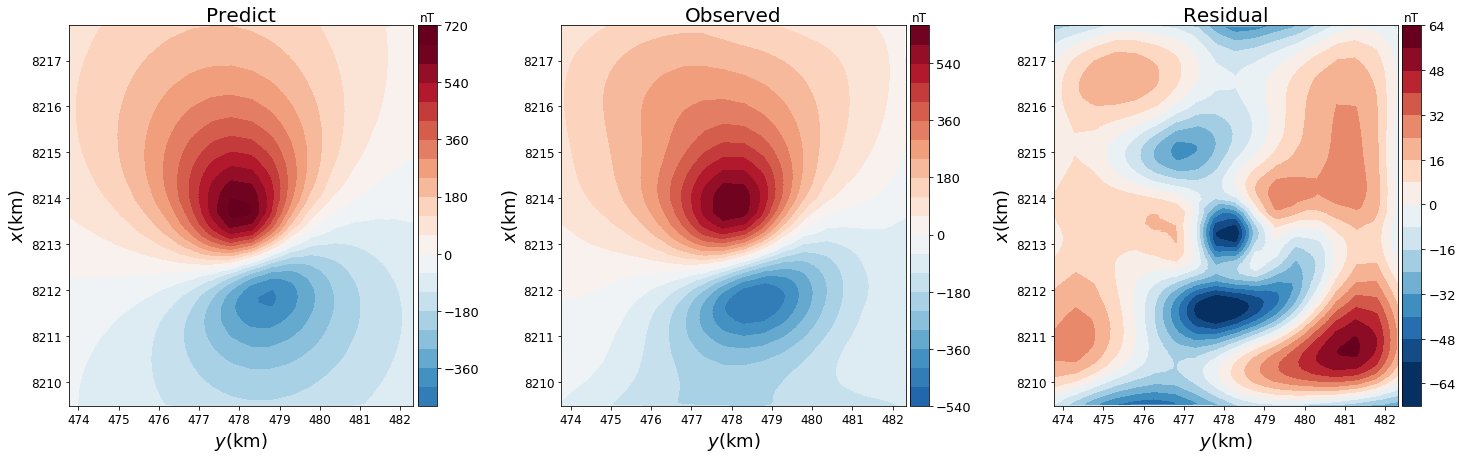

In [62]:
# plot
plt.figure(figsize=(25,7))
plt.subplot(1, 3, 1)
plt.title('Predict', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.max(di['observed_data'])*(-1), vmax=np.max(di['observed_data']))
plt.tricontourf(di['yp'], di['xp'], di['data_fit'],20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
plt.ylim((np.min(di['xp']), np.max(di['xp'])))
plt.xlim((np.min(di['yp']), np.max(di['yp'])))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
mpl.m2km()

plt.subplot(1, 3, 2)
plt.title('Observed', fontsize=20)
plt.tricontourf(di['yp'], di['xp'], di['observed_data'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
plt.ylim((np.min(di['xp']), np.max(di['xp'])))
plt.xlim((np.min(di['yp']), np.max(di['yp'])))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
mpl.m2km()

plt.subplot(1, 3, 3)
plt.title('Residual', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.max(di['residual'])*(-1), vmax=np.max(di['residual']))
plt.tricontourf(di['yp'], di['xp'], di['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
plt.ylim((np.min(di['xp']), np.max(di['xp'])))
plt.xlim((np.min(di['yp']), np.max(di['yp'])))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
mpl.m2km()
plt.savefig(mypath+'diorama_tfa_fit.png', dpi=300, bbox_inches="tight")
plt.show()
#img(filename=mypath+'diorama_tfa_fit.png', width=1600, height=400)

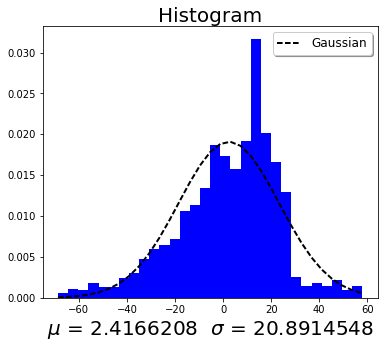

In [63]:
mean = np.mean(di['residual'])
std = np.std(di['residual'])
plt.figure(figsize=(6,5))
plt.title('Histogram', fontsize = 20)
plt.xlabel('$\mu$ = %.7f  $\sigma$ = %.7f' % (mean, std), fontsize=20)
nbins=30
n, bins, patches = plt.hist(di['residual'],bins=nbins, normed=True, color='blue')
gauss = normpdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=2., label='Gaussian')
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)
plt.savefig(mypath+'diorama_tfa_hist.png', dpi=300, bbox_inches="tight")
plt.show()

#img(filename=mypath+'diorama_tfa_hist.png', width=400, height=400)

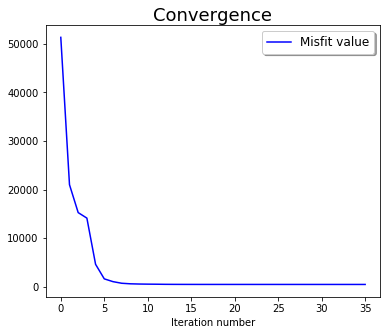

In [64]:
plt.figure(figsize=(6,5))
plt.title('Convergence', fontsize = 18)
plt.xlabel('Iteration number')
plt.plot(di['objective'], 'b-', label='Misfit value')
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)

plt.savefig(mypath+'diorama_tfa_convergence.png', dpi=300, bbox_inches="tight")
plt.show()

#img(filename=mypath+'diorama_tfa_convergence.png', width=400, height=400)

In [65]:
bounds = [8209000., 8217000., 475000., 482000., -100., di['estimate'][-1]*len(di['prisms']) + di['z0']]

red, green, blue = (1, 0, 0), (0, 1, 0), (0, 0, 1)
white, black = (1, 1, 1), (0, 0, 0),

# Show the model
scene = myv.figure(size=(500,400))
#myv.polyprisms(kimberlite_model['prisms'], 'magnetization', color=blue, linewidth=1., opacity=.5, edges=False)
myv.polyprisms(di['prisms'], 'magnetization', color=red, linewidth=1.)


ax = myv.axes(myv.outline(bounds), ranges=[i * 0.001 for i in bounds])
ax.axes.x_label, ax.axes.y_label, ax.axes.z_label = 'x (km)', 'y (km)', 'z (km)'
ax.axes.font_factor = 1.8
ax.axes.label_format = '%-#.1f'

scene.scene.camera.position = [8187637.0469755623, 481653.25624170218, 2214.7411601475815]
scene.scene.camera.focal_point = [8213000.0, 478500.0, 3860.9519856549205]
scene.scene.camera.view_angle = 30.0
scene.scene.camera.view_up = [0.066895359524348566, 0.017247560416207605, -0.99761091239711153]
scene.scene.camera.clipping_range = [16108.030959791831, 37635.457125529705]
scene.scene.camera.compute_view_plane_normal()
scene.scene.render()

myv.wall_bottom(ax.axes.bounds, opacity=0.2)
myv.wall_north(ax.axes.bounds)
#myv.title('bolacha', color=(0, 0, 0), size=1.3, height=0.5)
myv.savefig(mypath+'diorama_tfa_bolacha0.png')
myv.show()

In [66]:
bounds = [8209000., 8217000., 475000., 482000., -100., 9000.]
# Show the model
scene = myv.figure(size=(500,400))
#myv.polyprisms(kimberlite_model['prisms'], 'magnetization', color=blue, linewidth=1., opacity=.5, edges=False)
myv.polyprisms(di['initial_estimate'], 'magnetization', color=red, linewidth=.1)


ax = myv.axes(myv.outline(bounds), ranges=[i * 0.001 for i in bounds])
ax.axes.x_label, ax.axes.y_label, ax.axes.z_label = 'x (km)', 'y (km)', 'z (km)'
ax.axes.font_factor = 1.8
ax.axes.label_format = '%-#.1f'

scene.scene.camera.position = [8187637.0469755623, 481653.25624170218, 2214.7411601475815]
scene.scene.camera.focal_point = [8213000.0, 478500.0, 3860.9519856549205]
scene.scene.camera.view_angle = 30.0
scene.scene.camera.view_up = [0.066895359524348566, 0.017247560416207605, -0.99761091239711153]
scene.scene.camera.clipping_range = [16108.030959791831, 37635.457125529705]
scene.scene.camera.compute_view_plane_normal()
scene.scene.render()

myv.wall_bottom(ax.axes.bounds, opacity=0.2)
myv.wall_north(ax.axes.bounds)
#myv.title('bolacha', color=(0, 0, 0), size=1.3, height=0.5)
myv.savefig(mypath+'diorama_tfa_bolacha_inicial.png')
myv.show()

In [67]:
x = di['xp']/1000.
y = di['yp']/1000.
z = di['zp']/1000.

for i in range(len(di['prisms'])):
    di['prisms'][i].x /= 1000.
    di['prisms'][i].y /= 1000.
    di['prisms'][i].z1 /= 1000.
    di['prisms'][i].z2 /= 1000.
verts = mfun.plot_prisms(di['prisms'])


for i in range(len(di['initial_estimate'])):
    di['initial_estimate'][i].x /= 1000.
    di['initial_estimate'][i].y /= 1000.
    di['initial_estimate'][i].z1 /= 1000.
    di['initial_estimate'][i].z2 /= 1000.
verts_initial = mfun.plot_prisms(di['initial_estimate'])

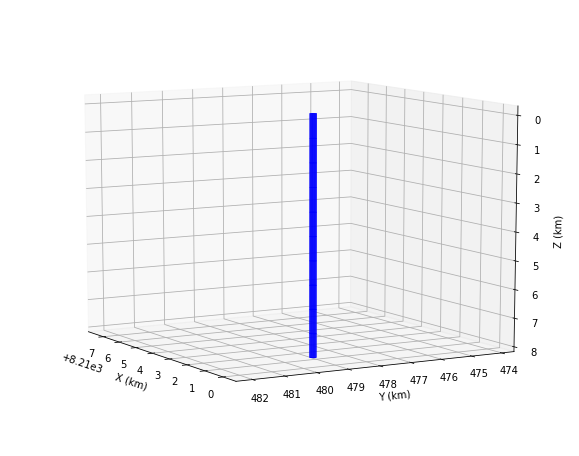

In [68]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts_initial, alpha=1, 
 facecolor='b', linewidths=0, edgecolors='k'))

ax.set_xlim(np.min(x), np.max(x), 100)
ax.set_ylim(np.min(y), np.max(y), 100)
ax.set_zlim(8, -0.150, 100)
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Z (km)')
ax.view_init(10, 150)
ax.set_xticks(np.linspace(np.min(x), np.max(x), 5), minor=True)
ax.set_yticks(np.linspace(np.min(y), np.max(y), 5), minor=True)
#ax.set_zticks(np.linspace(6, 0, 6), minor=True)

#norm=mpb.colors.Normalize(vmin=np.min(di['residual']), vmax=np.min(di['residual'])*(-1))
#ax.tricontourf(x, y, di['residual'],
#                zdir='z', offset=-0.100, cmap='RdBu_r', norm=norm)

plt.savefig(mypath+'diorama_3d_initial_estimate.png', dpi=300, bbox_inches="tight")
plt.show()

#img(filename=mypath+'complex_3d_estimate.png', width=400, height=400)

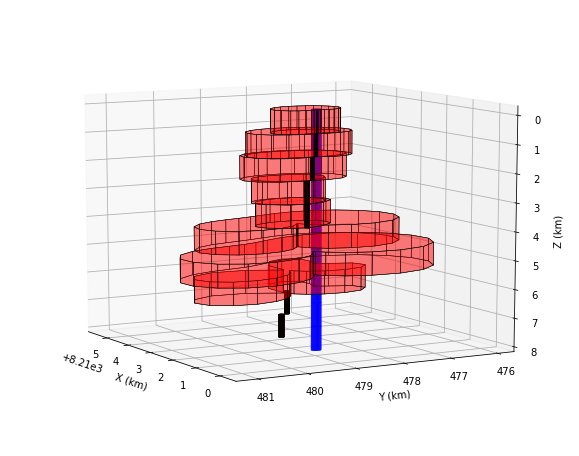

In [86]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(verts_initial, alpha=1, 
 facecolor='b', linewidths=0, edgecolors='k'))

ax.set_xlim(np.min(x), np.max(x)-2, 100)
ax.set_ylim(np.min(y)+2, np.max(y)-1, 100)
ax.set_zlim(8, -0.150, 100)
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Z (km)')
ax.view_init(10, 150)
ax.set_xticks(np.linspace(np.min(x), np.max(x)-2, 5), minor=True)
ax.set_yticks(np.linspace(np.min(y)+2, np.max(y)-1, 5), minor=True)
#ax.set_zticks(np.linspace(6, 0, 6), minor=True)

#norm=mpb.colors.Normalize(vmin=np.min(di['residual']), vmax=np.min(di['residual'])*(-1))
#ax.tricontourf(x, y, di['residual'],
#                zdir='z', offset=-0.100, cmap='RdBu_r', norm=norm)

plt.savefig(mypath+'diorama_3d_estimate.png', dpi=300, bbox_inches="tight")
plt.show()

#img(filename=mypath+'complex_3d_estimate.png', width=400, height=400)

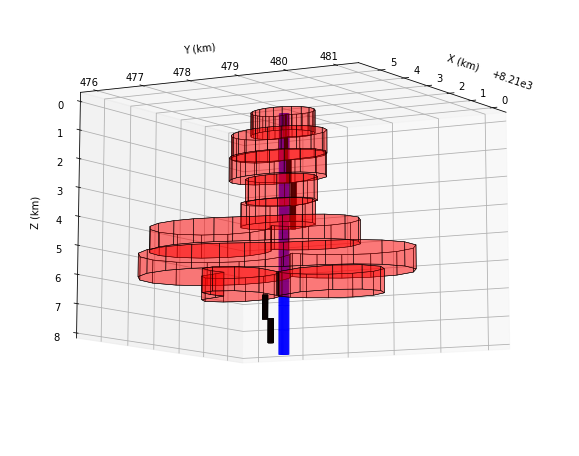

In [87]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(verts_initial, alpha=1, 
 facecolor='b', linewidths=0, edgecolors='k'))

ax.set_xlim(np.min(x), np.max(x)-2, 100)
ax.set_ylim(np.min(y)+2, np.max(y)-1, 100)
ax.set_zlim(8, -0.150, 100)
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Z (km)')
ax.view_init(-10, 30)
ax.set_xticks(np.linspace(np.min(x), np.max(x)-2, 5), minor=True)
ax.set_yticks(np.linspace(np.min(y)+2, np.max(y)-1, 5), minor=True)
#ax.set_zticks(np.linspace(6, 0, 6), minor=True)

#norm=mpb.colors.Normalize(vmin=np.min(di['residual']), vmax=np.min(di['residual'])*(-1))
#ax.tricontourf(x, y, di['residual'],
#                zdir='z', offset=-0.100, cmap='RdBu_r', norm=norm)

plt.savefig(mypath+'diorama_3d_estimate2.png', dpi=300, bbox_inches="tight")
plt.show()

#img(filename=mypath+'complex_3d_estimate.png', width=400, height=400)

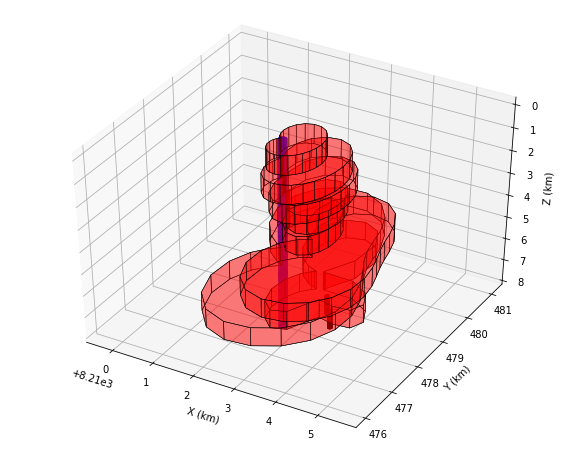

In [88]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(verts_initial, alpha=1, 
 facecolor='b', linewidths=0, edgecolors='k'))

ax.set_xlim(np.min(x), np.max(x)-2, 100)
ax.set_ylim(np.min(y)+2, np.max(y)-1, 100)
ax.set_zlim(8, -0.150, 100)
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Z (km)')
ax.view_init(40, 300)
ax.set_xticks(np.linspace(np.min(x), np.max(x)-2, 4), minor=True)
ax.set_yticks(np.linspace(np.min(y)+2, np.max(y)-1, 5), minor=True)
#ax.set_zticks(np.linspace(6, 0, 6), minor=True)

#norm=mpb.colors.Normalize(vmin=np.min(di['residual']), vmax=np.min(di['residual'])*(-1))
#ax.tricontourf(x, y, di['residual'],
#                zdir='z', offset=-0.100, cmap='RdBu_r', norm=norm)

plt.savefig(mypath+'diorama_3d_estimate3.png', dpi=300, bbox_inches="tight")
plt.show()

#img(filename=mypath+'complex_3d_estimate.png', width=400, height=400)

In [71]:
np.max(x) - 5

8212.76829

In [89]:
di['xp'].size

1939